In [ ]:
### Data 642 Project By Aidan Hennessy and Emily Eames

In [ ]:
### Part 1

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


sp500_ticker_proj = '^GSPC'
nifty50_ticker_proj = '^NSEI'

sp500_proj_data = yf.download(sp500_ticker_proj, start="2013-01-01", 
                              end="2019-12-31", 
                              auto_adjust=True)
print("S&P 500 7-year Data Sample:")
print(sp500_proj_data.head())


nifty50_proj_data = yf.download(nifty50_ticker_proj, start="2013-01-01", 
                                end="2019-12-31", 
                                auto_adjust=True)
print("\nNifty 50 7-year Data Sample:")
print(nifty50_proj_data.head())

[*********************100%***********************]  1 of 1 completed


S&P 500 7-year Data Sample:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2013-01-02  1462.420044  1462.430054  1426.189941  1426.189941  4202600000
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000


[*********************100%***********************]  1 of 1 completed


Nifty 50 7-year Data Sample:
Price             Close         High          Low         Open Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI
Date                                                                 
2013-01-02  5993.250000  6006.049805  5982.000000  5982.600098      0
2013-01-03  6009.500000  6017.000000  5986.549805  6015.799805      0
2013-01-04  6016.149902  6020.750000  5981.549805  6011.950195      0
2013-01-07  5988.399902  6042.149902  5977.149902  6042.149902      0
2013-01-08  6001.700195  6007.049805  5964.399902  5983.450195      0


In [2]:
len(nifty50_proj_data)

1708

In [3]:
nifty50_proj_data.columns

MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])

In [4]:
len(sp500_proj_data)

1761

In [5]:
from sklearn.ensemble import IsolationForest

In [ ]:
### S&P500 observes fewer holidays than Nifty50, 
### so S&P500 has slighlty more observations
### than Nifty50.

### S&P 500 has 1231 trading days and 528 testing days.
### Nifty50 has 1194 training days and 514 testing days. 

In [6]:
split_index_sp500 = int(len(sp500_proj_data) * 0.70)

train_data_sp500 = sp500_proj_data.iloc[:split_index_sp500]
test_data_sp500 = sp500_proj_data.iloc[split_index_sp500:]

train_data_sp500['Return'] = train_data_sp500['Close'].pct_change()
test_data_sp500['Return']  = test_data_sp500['Close'].pct_change()

train_data_sp500 = train_data_sp500[train_data_sp500['Return'].notna()]
test_data_sp500  = test_data_sp500[test_data_sp500['Return'].notna()]

print(f"Training data size: {len(train_data_sp500)}")
print(f"Testing data size: {len(test_data_sp500)}")
print("\nTraining data head:")
print(train_data_sp500.head())
print("\nTesting data head:")
print(test_data_sp500.head())

train_data_sp500.to_csv("train_data_sp500_rev.csv")
test_data_sp500.to_csv("test_data_sp500_rev.csv")


Training data size: 1231
Testing data size: 528

Training data head:
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000   
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000   
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000   
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000   
2013-01-09  1461.020020  1464.729980  1457.150024  1457.150024  3674390000   

Price         Return  
Ticker                
Date                  
2013-01-03 -0.002086  
2013-01-04  0.004865  
2013-01-07 -0.003123  
2013-01-08 -0.003242  
2013-01-09  0.002656  

Testing data head:
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC 

In [7]:
from sklearn.preprocessing import StandardScaler

split_index_nifty50 = int(len(nifty50_proj_data) * 0.70)

train_data_nifty50 = nifty50_proj_data.iloc[:split_index_nifty50]
test_data_nifty50 = nifty50_proj_data.iloc[split_index_nifty50:]

train_data_nifty50['Return'] = train_data_nifty50['Close'].pct_change()
test_data_nifty50['Return']  = test_data_nifty50['Close'].pct_change()

train_data_nifty50 = train_data_nifty50.dropna()
test_data_nifty50  = test_data_nifty50.dropna()

scaler_nifty50 = StandardScaler()
X_train_nifty50 = scaler_nifty50.fit_transform(train_data_nifty50[['Return']])
X_test_nifty50  = scaler_nifty50.transform(test_data_nifty50[['Return']])


print(f"Training data size: {len(train_data_nifty50)}")
print(f"Testing data size: {len(test_data_nifty50)}")
print("\nTraining data head:")
print(train_data_nifty50.head())
print("\nTesting data head:")
print(test_data_nifty50.head())

train_data_nifty50.to_csv("train_data_nifty50_rev.csv")
test_data_nifty50.to_csv("test_data_nifty50_rev.csv")

Training data size: 1194
Testing data size: 512

Training data head:
Price             Close         High          Low         Open Volume  \
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI  ^NSEI   
Date                                                                    
2013-01-03  6009.500000  6017.000000  5986.549805  6015.799805      0   
2013-01-04  6016.149902  6020.750000  5981.549805  6011.950195      0   
2013-01-07  5988.399902  6042.149902  5977.149902  6042.149902      0   
2013-01-08  6001.700195  6007.049805  5964.399902  5983.450195      0   
2013-01-09  5971.500000  6020.100098  5958.450195  6006.200195      0   

Price         Return  
Ticker                
Date                  
2013-01-03  0.002711  
2013-01-04  0.001107  
2013-01-07 -0.004613  
2013-01-08  0.002221  
2013-01-09 -0.005032  

Testing data head:
Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NS

In [ ]:
### 32 anomalies were detected in S&P500. That is 6.06% of 
### all the observations in the testing data. 

In [8]:
import joblib
import numpy as np

scaler_sp500 = StandardScaler()
X_train_sp500 = scaler_sp500.fit_transform(train_data_sp500[['Return']])
X_test_sp500  = scaler_sp500.transform(test_data_sp500[['Return']])

i_forest_sp500 = IsolationForest(n_estimators=200, contamination=0.03, 
                                 random_state=42)
i_forest_sp500.fit(X_train_sp500)

train_scores_sp500 = i_forest_sp500.decision_function(X_train_sp500)
threshold_sp500 = np.percentile(train_scores_sp500, 3) 

model_sp500 = joblib.dump(i_forest_sp500, f"SP500_iso_forest.pkl")

test_data_sp500['anomaly'] = i_forest_sp500.predict(X_test_sp500)    
test_data_sp500['anomaly_score'] = i_forest_sp500.decision_function(X_test_sp500)



anomalies_sp500 = test_data_sp500[test_data_sp500['anomaly'] == -1]
total_points_sp500 = len(test_data_sp500)
total_anomalies_sp500 = len(anomalies_sp500)
pct_anomalies_sp500 = 100 * total_anomalies_sp500 / total_points_sp500

print(f"\n S&P 500")
print(f"Total data points: {total_points_sp500}")
print(f"Total anomalies detected: {total_anomalies_sp500}")
print(f"Percentage anomalies: {pct_anomalies_sp500:.3f}%")
print(f"Anomalies detected for S&P 500")
print(anomalies_sp500.head())
test_data_sp500.to_csv(f"Anomalies_SP500_rev.csv")



 S&P 500
Total data points: 528
Total anomalies detected: 32
Percentage anomalies: 6.061%
Anomalies detected for S&P 500
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2018-02-02  2762.129883  2808.919922  2759.969971  2808.919922  4340220000   
2018-02-05  2648.939941  2763.389893  2638.169922  2741.060059  5310840000   
2018-02-08  2581.000000  2685.270020  2580.560059  2685.010010  5333840000   
2018-03-22  2643.689941  2695.679932  2641.590088  2691.360107  3765460000   
2018-03-23  2588.260010  2657.669922  2585.889893  2646.709961  3829380000   

Price         Return anomaly anomaly_score  
Ticker                                      
Date                                        
2018-02-02 -0.021209      -1     -0.036433  
2018-02-05 -0.040979      -1     -0.152494  
2018-02-08 -0.037536      -1

In [9]:
anomalies_sp500 = test_data_sp500[test_data_sp500['anomaly'] == -1]
pct_anomalies_sp500 = 100 * len(anomalies_sp500) / len(test_data_sp500)
print(f"Percentage anomalies: {pct_anomalies_sp500:.3f}%")

Percentage anomalies: 6.061%


In [ ]:
### This chart shows that S&P500 is forecasted to undergo more than one 
### long period of financial anomalies. The longest period being 
### forecasted to be approximately three months from October 2018 to 
### January 2019. 

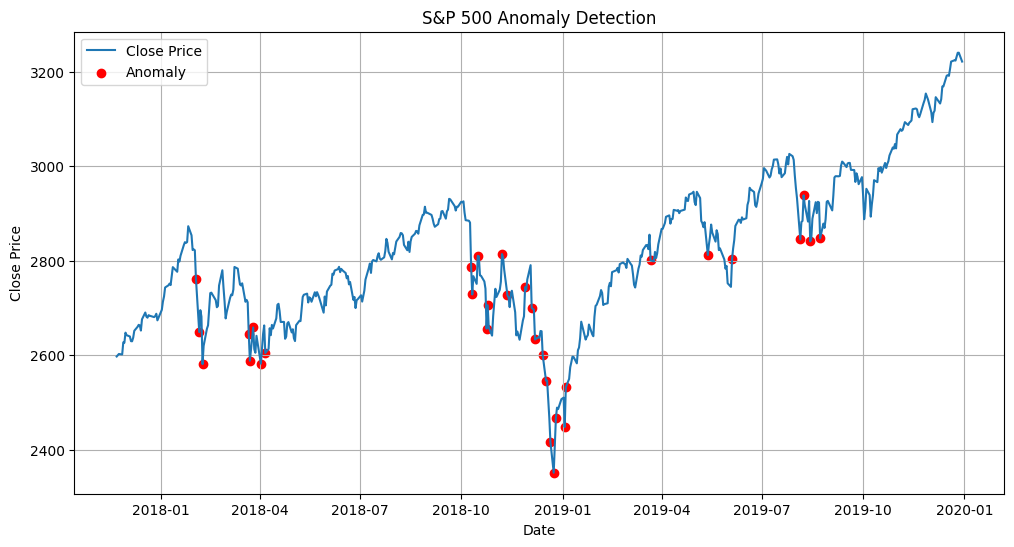

In [10]:
plt.figure(figsize=(12,6))
plt.plot(test_data_sp500.index, test_data_sp500['Close'], label='Close Price')
plt.scatter(anomalies_sp500.index, anomalies_sp500['Close'], color='red', 
            label='Anomaly')
plt.title('S&P 500 Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### India is forecasted to have anomalies in 11 out of the 512 observations
### in the dataset. 

In [11]:
scaler_nifty50 = StandardScaler()
X_train_nifty50 = scaler_nifty50.fit_transform(train_data_nifty50[['Return']])

i_forest_nifty50 = IsolationForest(n_estimators=200, contamination=0.03, 
                                   random_state=42)
i_forest_nifty50.fit(X_train_nifty50)

train_scores_nifty50 = i_forest_nifty50.decision_function(X_train_nifty50)
threshold_nifty50 = np.percentile(train_scores_nifty50, 3) 

model_nifty50 = joblib.dump(i_forest_nifty50, f"nifty50_iso_forest.pkl")

X_test_nifty50  = scaler_nifty50.transform(test_data_nifty50[['Return']])

test_data_nifty50['anomaly'] = i_forest_nifty50.predict(X_test_nifty50)    
test_data_nifty50['anomaly_score'] = i_forest_nifty50.decision_function(
    X_test_nifty50)

anomalies_nifty50 = test_data_nifty50[test_data_nifty50['anomaly'] == -1]
total_points_nifty50 = len(test_data_nifty50)
total_anomalies_nifty50 = len(anomalies_nifty50)
pct_anomalies_nifty50 = 100 * total_anomalies_nifty50 / total_points_nifty50

print(f"\n Nifty50 500")
print(f"Total data points: {total_points_nifty50}")
print(f"Total anomalies detected: {total_anomalies_nifty50}")
print(f"Percentage anomalies: {pct_anomalies_nifty50:.3f}%")
print(f"Anomalies detected for Nifty50")
print(anomalies_nifty50.head())
test_data_nifty50.to_csv(f"Anomalies_nifty50.csv")



 Nifty50 500
Total data points: 512
Total anomalies detected: 11
Percentage anomalies: 2.148%
Anomalies detected for Nifty50
Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2018-02-02  10760.599609  10954.950195  10736.099609  10938.200195  282700   
2018-10-04  10599.250000  10754.700195  10547.250000  10754.700195  425100   
2018-10-05  10316.450195  10540.650391  10261.900391  10514.099609  606400   
2018-10-11  10234.650391  10335.950195  10138.599609  10169.799805  483500   
2018-10-12  10472.500000  10492.450195  10322.150391  10331.549805  343500   

Price         Return anomaly anomaly_score  
Ticker                                      
Date                                        
2018-02-02 -0.023264      -1     -0.041949  
2018-10-04 -0.023853      -1     -0.055587  
2018-10-05 -0.026681    

In [ ]:
### This shows that India is expected to have anomalies that 
### last way shorter than S&P500. This is shocking because
### it was previously expected that India would take longer
### to recover from financial shocks, but this shows the opposite
### is true. It shows that the USA is forecasted to take 
### more time to recover from financial shocks than India. 
### We have found some literature that backs up this 
### shocking revelation in our data. 

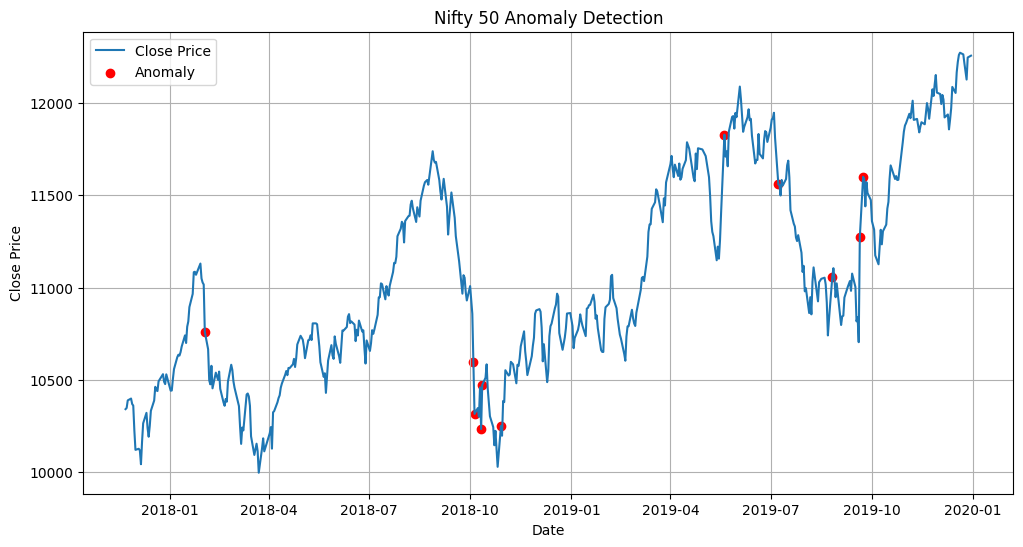

In [12]:
plt.figure(figsize=(12,6))
plt.plot(test_data_nifty50.index, test_data_nifty50['Close'], label='Close Price')
plt.scatter(anomalies_nifty50.index, anomalies_nifty50['Close'], color='red', 
            label='Anomaly')
plt.title('Nifty 50 Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### This shows that for both S&P500 and Nifty50, 
### the threshold of an anomaly score was below 0.
### This meant that any observation with an 
### anomaly score below 0 is considered an anomaly. 

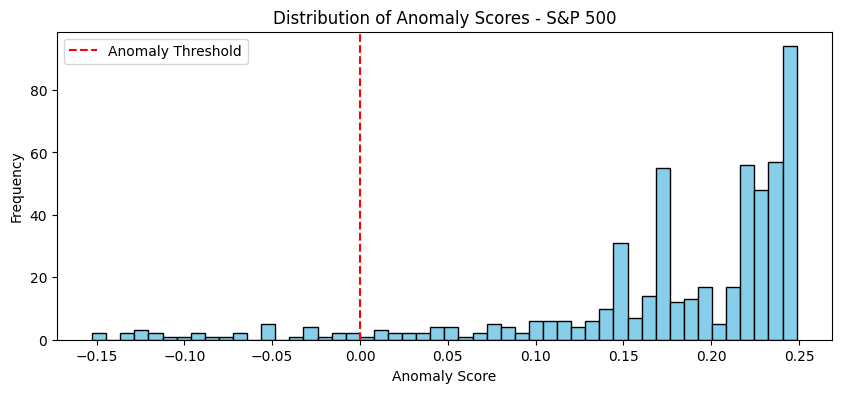

In [13]:
plt.figure(figsize=(10,4))
plt.hist(test_data_sp500['anomaly_score'], bins=50, color='skyblue', 
         edgecolor='black')
plt.axvline(threshold_sp500, color='red', linestyle='--', 
            label='Anomaly Threshold')
plt.title('Distribution of Anomaly Scores - S&P 500')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

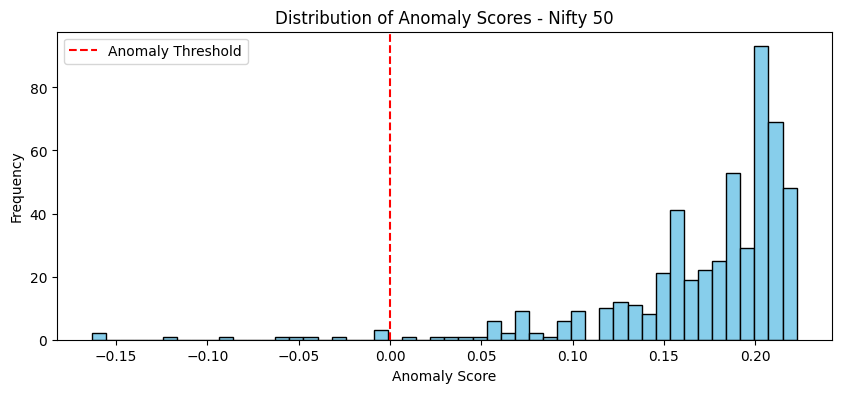

In [14]:
plt.figure(figsize=(10,4))
plt.hist(test_data_nifty50['anomaly_score'], bins=50, color='skyblue', 
         edgecolor='black')
plt.axvline(threshold_nifty50, color='red', linestyle='--', 
            label='Anomaly Threshold')
plt.title('Distribution of Anomaly Scores - Nifty 50')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
### Way more anomaly incidents have been identified with S&P500 
### than with Nifty50. Nifty50 is forecasted to have 11 financial 
### anomaly problems. While S&P500 is expected to have 32 financial 
### anaomalies that. This is a complete shock because Nifty50 is 
### from India, a developing nation. While S&P500 is from the USA,
### a developed nation. And we initially assumed financial anomalies
### would happen way more often in India than in the USA. 

In [ ]:
### Here we build the foundation of the project we will later use. 

In [15]:
 sp500_close = sp500_proj_data[("Close", "^GSPC")]
 nifty_close = nifty50_proj_data[("Close", "^NSEI")]
 sp500_ret = sp500_close.pct_change().dropna()
 nifty_ret = nifty_close.pct_change().dropna()
 returns = pd.concat([sp500_ret, nifty_ret], axis=1, join="inner")
 returns.columns = ["SP500_Return", "NIFTY_Return"]

In [ ]:
### We discover with Local Outlier Factor (LOF) that
### 18 total observations in our testing data will
### be anomalies. 

In [16]:
from sklearn.neighbors import LocalOutlierFactor
split_idx = int(len(returns) * 0.7)
train = returns.iloc[:split_idx].copy()
test  = returns.iloc[split_idx:].copy()
features = ["SP500_Return", "NIFTY_Return"]
X_train = train[features].to_numpy()
X_test = test[features].to_numpy()
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.03,
    novelty=True
 )

lof.fit(X_train)
train.loc[:, "LOF_label"] = lof.predict(X_train)
train.loc[:, "LOF_score"] = -lof.score_samples(X_train)
test.loc[:, "LOF_label"] = lof.predict(X_test)
test.loc[:, "LOF_score"] = -lof.score_samples(X_test)

In [17]:
test["LOF_label"]
test["LOF_score"]
lof_anomalies = test[test["LOF_label"] == -1]
lof_anomalies
train_anomalies = train.sort_values("LOF_score", ascending=False).head(20)
train_anomalies
test["LOF_label"].value_counts()

LOF_label
 1    482
-1     18
Name: count, dtype: int64

In [ ]:
### Here is the map of normal observations and anomalies. 

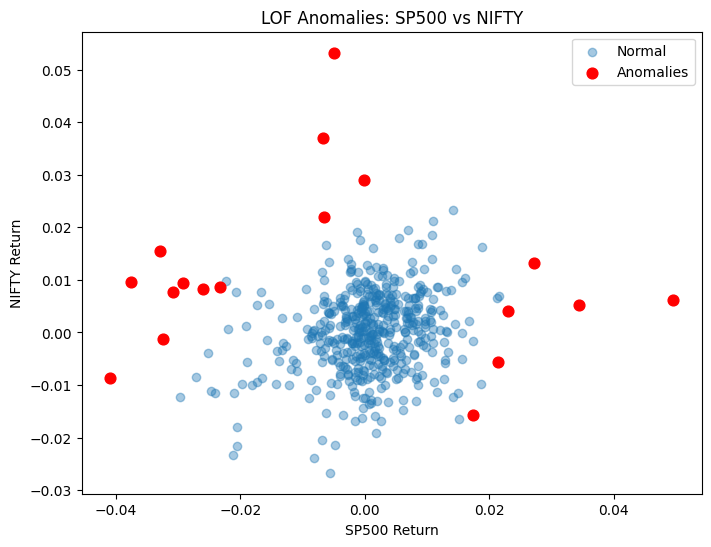

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(
    test[test["LOF_label"] == 1]["SP500_Return"],
    test[test["LOF_label"] == 1]["NIFTY_Return"],
    alpha=0.4,
    label="Normal"
)
plt.scatter(
    test[test["LOF_label"] == -1]["SP500_Return"],
    test[test["LOF_label"] == -1]["NIFTY_Return"],
    color="red",
    s=60,
    label="Anomalies"
)
plt.xlabel("SP500 Return")
plt.ylabel("NIFTY Return")
plt.title("LOF Anomalies: SP500 vs NIFTY")
plt.legend()
plt.show()

In [ ]:
### When comparing these two charts, we can see that 
### S&P500 returns are either really high or really
### low on the 18 days when anomalies are forecasted
### to occur. 

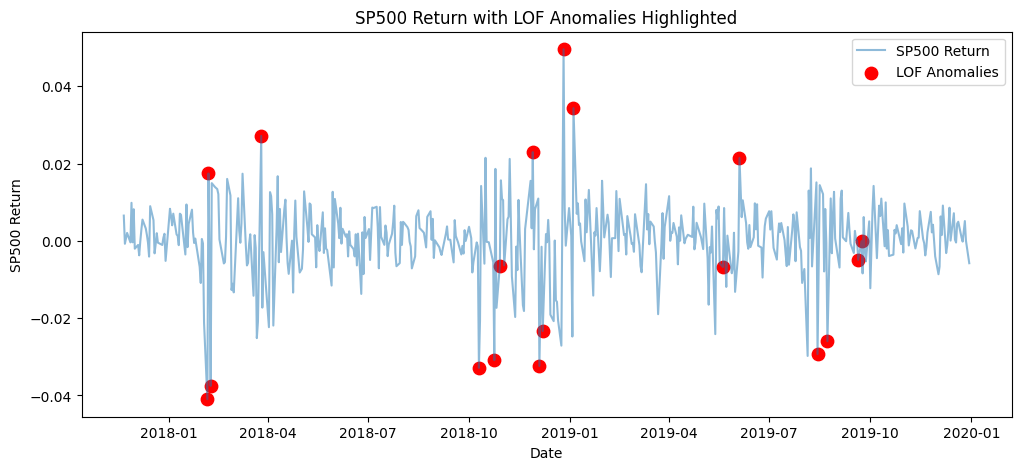

In [19]:
anoms_init = test[test["LOF_label"] == -1]

plt.figure(figsize=(12,5))
plt.plot(
    test.index,
    test["SP500_Return"],
    label="SP500 Return",
    alpha=0.5
)



plt.scatter(
    anoms_init.index,
    anoms_init["SP500_Return"],
    color="red",
    s=80,
    label="LOF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("SP500 Return")
plt.title("SP500 Return with LOF Anomalies Highlighted")
plt.show()

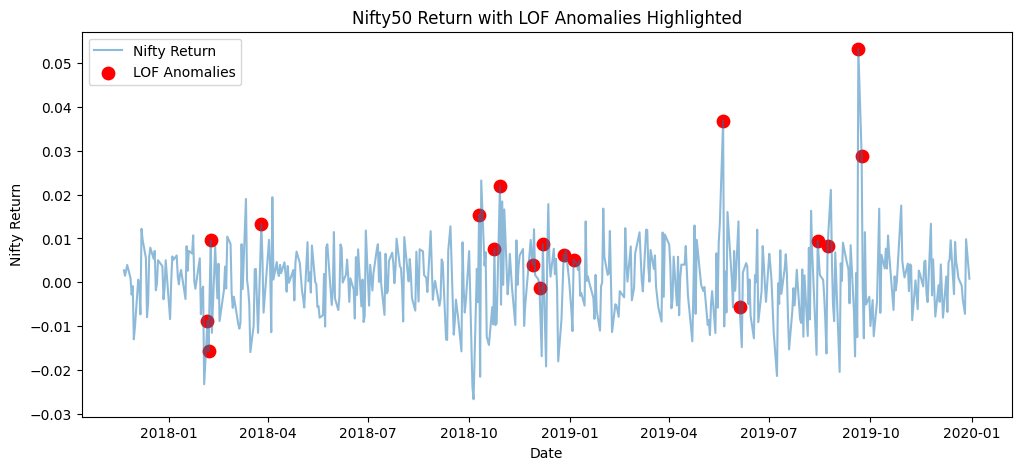

In [20]:
plt.figure(figsize=(12,5))
plt.plot(
    test.index,
    test["NIFTY_Return"],
    label="Nifty Return",
    alpha=0.5
)

plt.scatter(
    anoms_init.index,
    anoms_init["NIFTY_Return"],
    color="red",
    s=80,
    label="LOF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Nifty Return")
plt.title("Nifty50 Return with LOF Anomalies Highlighted")
plt.show()

In [ ]:
### Here we build the datasets we will use to detect
### the influence of features beyond just returns
### in S&P500 and Nifty50. 

### We add new columns that will be our featrues, 
### including one that returns a z-score, 
### average true rate (ATR), realized volaitlity 
### and momentum at 5 and momentum at 20. 
### We make them into features after we name them. 

In [21]:
sp500_proj_data = sp500_proj_data.copy()
sp500_proj_data.columns = sp500_proj_data.columns.get_level_values(0)
sp500_proj_data.index = pd.to_datetime(sp500_proj_data.index)
train_data_sp500 = train_data_sp500.copy()
train_data_sp500.columns = train_data_sp500.columns.get_level_values(0)
train_data_sp500.index = pd.to_datetime(train_data_sp500.index)
test_data_sp500 = test_data_sp500.copy()
test_data_sp500.columns = test_data_sp500.columns.get_level_values(0)
test_data_sp500.index = pd.to_datetime(test_data_sp500.index)

nifty50_proj_data = nifty50_proj_data.copy()
nifty50_proj_data.columns = nifty50_proj_data.columns.get_level_values(0)
nifty50_proj_data.index = pd.to_datetime(nifty50_proj_data.index)
train_data_nifty50 = train_data_nifty50.copy()
train_data_nifty50.columns = train_data_nifty50.columns.get_level_values(0)
train_data_nifty50.index = pd.to_datetime(train_data_nifty50.index)
test_data_nifty50 = test_data_nifty50.copy()
test_data_nifty50.columns = test_data_nifty50.columns.get_level_values(0)
test_data_nifty50.index = pd.to_datetime(test_data_nifty50.index)

In [22]:
sp500_close = sp500_proj_data["Close"]
nifty_close = nifty50_proj_data["Close"]
sp500_ret = sp500_close.pct_change().dropna()
nifty_ret = nifty_close.pct_change().dropna()
returns = pd.concat([sp500_ret, nifty_ret], axis=1).dropna()
returns.columns = ["SP500_Return", "NIFTY_Return"]

In [23]:
len(sp500_ret)

1760

In [24]:
returns["SP500_mean20"] = returns["SP500_Return"].rolling(20).mean()
returns["SP500_std20"] = returns["SP500_Return"].rolling(20).std()
returns["SP500_return_z"] = (returns["SP500_Return"] - 
                             returns["SP500_mean20"]) / returns["SP500_std20"]
returns["NIFTY_mean20"] = returns["NIFTY_Return"].rolling(20).mean()
returns["NIFTY_std20"] = returns["NIFTY_Return"].rolling(20).std()

In [25]:
returns["NIFTY_return_z"] = (returns["NIFTY_Return"] - 
                             returns["NIFTY_mean20"]) / returns["NIFTY_std20"]

In [26]:
sp500_high = sp500_proj_data["High"]
sp500_low = sp500_proj_data["Low"]
nifty_high = nifty50_proj_data["High"]
nifty_low = nifty50_proj_data["Low"]
returns["SP500_ATR"] = (sp500_high - sp500_low).rolling(14).mean()
returns["NIFTY_ATR"] = (nifty_high - nifty_low).rolling(14).mean()

returns["SP500_realized_vol"] = (returns["SP500_Return"]**2).rolling(20).sum()
returns["NIFTY_realized_vol"] = (returns["NIFTY_Return"]**2).rolling(20).sum()

returns["SP500_momentum5"] = returns["SP500_Return"].rolling(5).sum()
returns["SP500_momentum20"] = returns["SP500_Return"].rolling(20).sum()
returns["NIFTY_momentum5"] = returns["NIFTY_Return"].rolling(5).sum()
returns["NIFTY_momentum20"] = returns["NIFTY_Return"].rolling(20).sum()

returns = returns.dropna()
print("Feature Engineering Complete. Columns:")
print(returns.columns)

Feature Engineering Complete. Columns:
Index(['SP500_Return', 'NIFTY_Return', 'SP500_mean20', 'SP500_std20',
       'SP500_return_z', 'NIFTY_mean20', 'NIFTY_std20', 'NIFTY_return_z',
       'SP500_ATR', 'NIFTY_ATR', 'SP500_realized_vol', 'NIFTY_realized_vol',
       'SP500_momentum5', 'SP500_momentum20', 'NIFTY_momentum5',
       'NIFTY_momentum20'],
      dtype='object')


In [27]:
lof_features = [
"SP500_Return", "NIFTY_Return",
"SP500_return_z", "NIFTY_return_z",
"SP500_ATR", "NIFTY_ATR",
"SP500_realized_vol", "NIFTY_realized_vol",
"SP500_momentum5", "NIFTY_momentum5",
"SP500_momentum20", "NIFTY_momentum20"
]

In [28]:
features = lof_features

In [ ]:
### With our additional features, 164 anomalies are detected. 
### That is way higher than the 18 we previously detected. 
### So clearly, returns by themselves were not enough. 

In [29]:
split_idx = int(len(returns) * 0.7)
train = returns.iloc[:split_idx].copy()
test = returns.iloc[split_idx:].copy()
X_train = train[lof_features].values
X_test = test[lof_features].values
lof = LocalOutlierFactor(
n_neighbors=20,
contamination=0.03,
novelty=True
)
lof.fit(X_train)
# Predictions
train["LOF_label"] = lof.predict(X_train)
train["LOF_score"] = -lof.score_samples(X_train)
test["LOF_label"] = lof.predict(X_test)
test["LOF_score"] = -lof.score_samples(X_test)
print("New LOF anomalies:", test["LOF_label"].value_counts())

New LOF anomalies: LOF_label
 1    330
-1    164
Name: count, dtype: int64


In [ ]:
### This shows the normal values and the anomalies revised. 

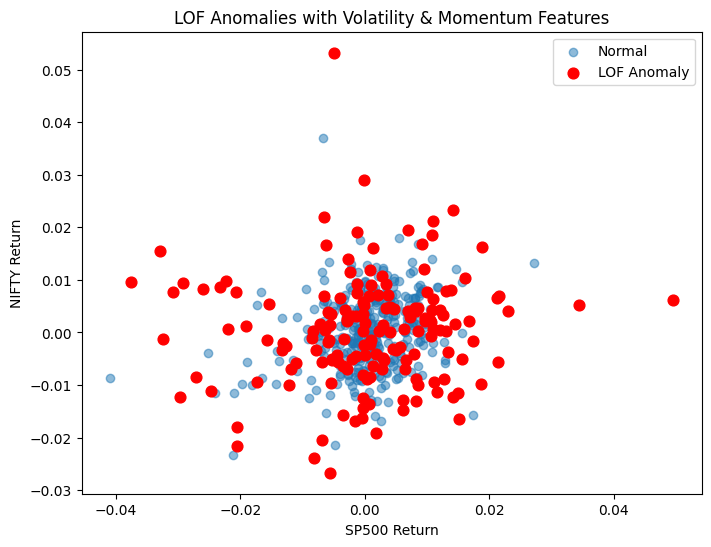

In [30]:
anoms = test[test["LOF_label"] == -1]

plt.figure(figsize=(8,6))
plt.scatter(
test[test["LOF_label"] == 1]["SP500_Return"],
test[test["LOF_label"] == 1]["NIFTY_Return"],
alpha=0.5, label="Normal"
)
plt.scatter(
test[test["LOF_label"] == -1]["SP500_Return"],
test[test["LOF_label"] == -1]["NIFTY_Return"],
c='red', s=60, label="LOF Anomaly"
)
plt.xlabel("SP500 Return")
plt.ylabel("NIFTY Return")
plt.title("LOF Anomalies with Volatility & Momentum Features")
plt.legend()
plt.show()

In [ ]:
### This plots these anomalies with the S&P500 returns and 
### Nifty50 returns separately 

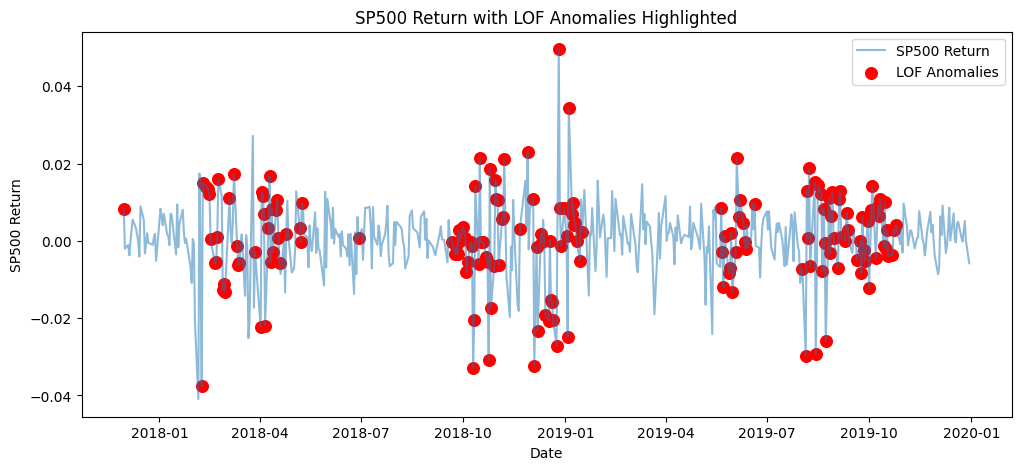

In [31]:
plt.figure(figsize=(12,5))
plt.plot(
    test.index,
    test["SP500_Return"],
    label="SP500 Return",
    alpha=0.5
)


plt.scatter(
    anoms.index,
    anoms["SP500_Return"],
    color="red",
    s=70,
    label="LOF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("SP500 Return")
plt.title("SP500 Return with LOF Anomalies Highlighted")
plt.show()

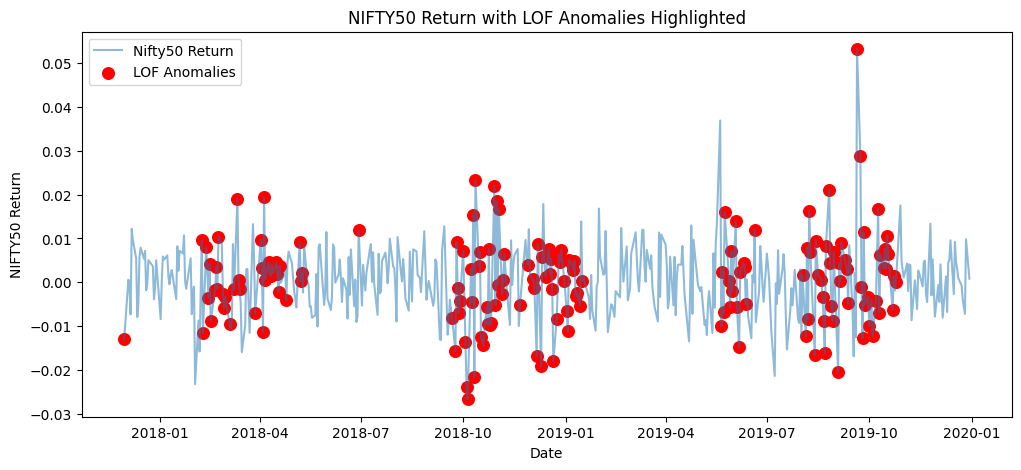

In [32]:
plt.figure(figsize=(12,5))
plt.plot(
    test.index,
    test["NIFTY_Return"],
    label="Nifty50 Return",
    alpha=0.5
)


plt.scatter(
    anoms.index,
    anoms["NIFTY_Return"],
    color="red",
    s=70,
    label="LOF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("NIFTY50 Return")
plt.title("NIFTY50 Return with LOF Anomalies Highlighted")
plt.show()

In [ ]:
### Isolation Forests (IF) detects way fewer anomalies, 56 anomalies. 

In [33]:
iso = IsolationForest(
n_estimators=200,
contamination=0.03,
random_state=42
)
iso.fit(train[lof_features])
test["IF_label"] = iso.predict(test[lof_features])
test["IF_score"] = iso.decision_function(test[lof_features])
print("New IF anomalies:", test["IF_label"].value_counts())

New IF anomalies: IF_label
 1    438
-1     56
Name: count, dtype: int64


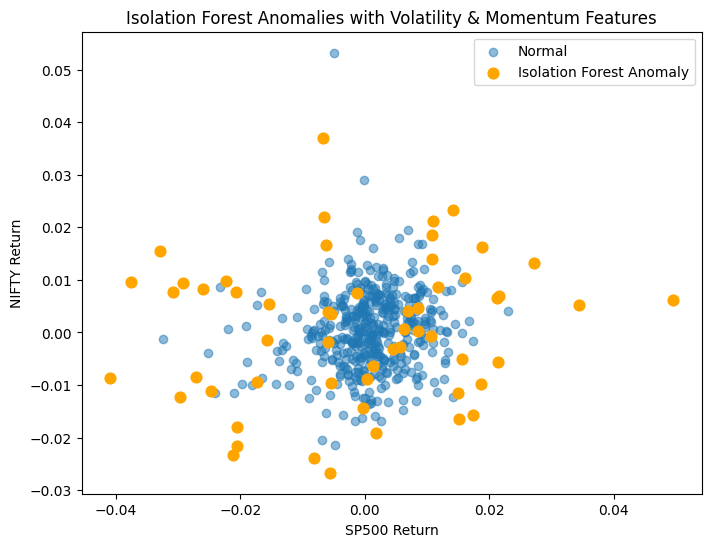

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(
    test[test["IF_label"] == 1]["SP500_Return"],
    test[test["IF_label"] == 1]["NIFTY_Return"],
    alpha=0.5, label="Normal"
)

plt.scatter(
    test[test["IF_label"] == -1]["SP500_Return"],
    test[test["IF_label"] == -1]["NIFTY_Return"],
    c='orange', s=60, label="Isolation Forest Anomaly"
)

plt.xlabel("SP500 Return")
plt.ylabel("NIFTY Return")
plt.title("Isolation Forest Anomalies with Volatility & Momentum Features")
plt.legend()
plt.show()

In [ ]:
### This is where we make a subset of our features columns
### to just include those columns from S&P500 to be used as
### features while trying to detect anomalies
### in Isolation Forest (IF) 

### There are 75 anomalies that have been detected in S&P500
### as a result of these new features being added. 

In [35]:
returns_sp500 = sp500_ret.to_frame(name="SP500_Return")
returns_sp500["SP500_Return"] = pd.to_numeric(
    returns_sp500["SP500_Return"], errors="coerce")
returns_sp500 = returns_sp500.dropna()

returns_sp500["SP500_mean20"] = returns_sp500[
    "SP500_Return"].rolling(20).mean()
returns_sp500["SP500_std20"] = returns_sp500[
    "SP500_Return"].rolling(20).std()
returns_sp500["SP500_return_z"] = ((returns_sp500["SP500_Return"] - 
                             returns_sp500["SP500_mean20"]) / 
                                   returns_sp500["SP500_std20"])

returns_sp500["SP500_ATR"] = (sp500_high - sp500_low).rolling(14).mean()
returns_sp500["SP500_realized_vol"] = (
    returns_sp500["SP500_Return"]**2).rolling(20).sum()
returns_sp500["SP500_momentum5"] = returns_sp500["SP500_Return"].rolling(5).sum()
returns_sp500["SP500_momentum20"] = returns_sp500[
    "SP500_Return"].rolling(20).sum()
returns_sp500 = returns_sp500.dropna()
print("Feature Engineering Complete. Columns:")
print(returns_sp500.columns)

Feature Engineering Complete. Columns:
Index(['SP500_Return', 'SP500_mean20', 'SP500_std20', 'SP500_return_z',
       'SP500_ATR', 'SP500_realized_vol', 'SP500_momentum5',
       'SP500_momentum20'],
      dtype='object')


In [36]:
lof_features_sp500 = [
    "SP500_Return", 
    "SP500_return_z", 
    "SP500_ATR", 
    "SP500_realized_vol", 
    "SP500_momentum5", 
    "SP500_momentum20",
]

In [37]:
features_sp500 = lof_features_sp500
split_idx_sp500 = int(len(returns_sp500) * 0.7)
train_sp500 = returns_sp500.iloc[:split_idx_sp500].copy()
test_sp500 = returns_sp500.iloc[split_idx_sp500:].copy()
X_train_sp500 = train_sp500[lof_features_sp500].values
X_test_sp500 = test_sp500[lof_features_sp500].values
iso_sp500 = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42
)
iso_sp500.fit(X_train_sp500)

train_sp500["IF_label"] = iso_sp500.predict(X_train_sp500)
train_sp500["IF_score"] = -iso_sp500.score_samples(X_train_sp500)
test_sp500["IF_label"] = iso_sp500.predict(X_test_sp500)
test_sp500["IF_score"] = -iso_sp500.score_samples(X_test_sp500)
print("New IF anomalies:", test_sp500["IF_label"].value_counts())

New IF anomalies: IF_label
 1    448
-1     75
Name: count, dtype: int64


In [ ]:
### Here we plot the IF anomalies with the new features. 

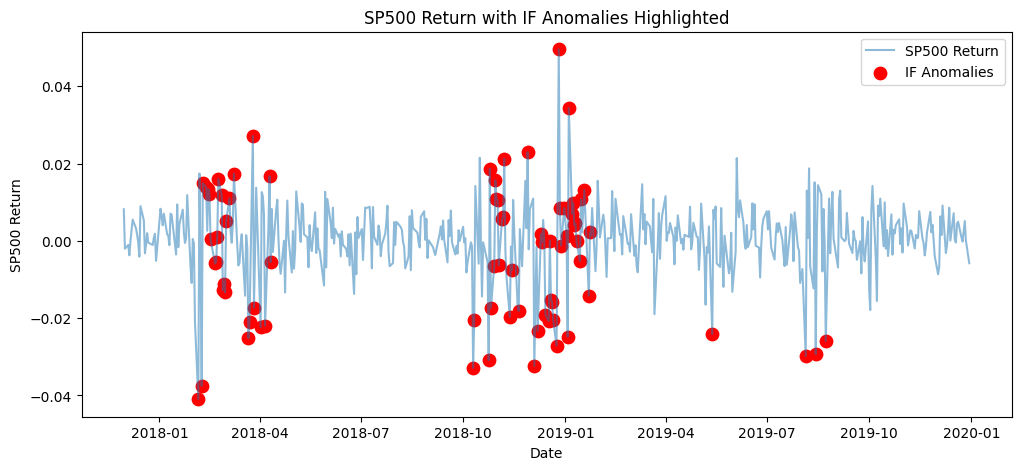

In [38]:
plt.figure(figsize=(12,5))
plt.plot(
    test_sp500.index,
    test_sp500["SP500_Return"],
    label="SP500 Return",
    alpha=0.5
)

anoms_rev = test_sp500[test_sp500["IF_label"] == -1]

plt.scatter(
    anoms_rev.index,
    anoms_rev["SP500_Return"],
    color="red",
    s=80,
    label="IF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("SP500 Return")
plt.title("SP500 Return with IF Anomalies Highlighted")
plt.show()

In [ ]:
### Here we make a subset with just Nifty50 columns to be 
### used as features. Through this we discover that
### 18 financial anomalies are forecasted to take place in the 
### testing dataset for Nifty50. 

In [39]:
returns_nifty50 = nifty_ret.to_frame(name="Nifty50_Return")
returns_nifty50["Nifty50_Return"] = pd.to_numeric(
    returns_nifty50["Nifty50_Return"], errors="coerce")
returns_nifty50 = returns_nifty50.dropna()

returns_nifty50["Nifty50_mean20"] = returns_nifty50[
    "Nifty50_Return"].rolling(20).mean()
returns_nifty50["Nifty50_std20"] = returns_nifty50[
    "Nifty50_Return"].rolling(20).std()
returns_nifty50["Nifty50_return_z"] = ((returns_nifty50["Nifty50_Return"] - 
                                     returns_nifty50["Nifty50_mean20"]) / 
                                       returns_nifty50["Nifty50_std20"])

returns_nifty50["Nifty50_ATR"] = (nifty_high - nifty_low).rolling(14).mean()
returns_nifty50["Nifty50_realized_vol"] = (
    returns_nifty50["Nifty50_Return"]**2).rolling(20).sum()
returns_nifty50["Nifty50_momentum5"] = returns_nifty50[
    "Nifty50_Return"].rolling(5).sum()
returns_nifty50["Nifty50_momentum20"] = returns_nifty50[
    "Nifty50_Return"].rolling(20).sum()
returns_nifty50 = returns_nifty50.dropna()
print("Feature Engineering Complete. Columns:")
print(returns_nifty50.columns)

Feature Engineering Complete. Columns:
Index(['Nifty50_Return', 'Nifty50_mean20', 'Nifty50_std20', 'Nifty50_return_z',
       'Nifty50_ATR', 'Nifty50_realized_vol', 'Nifty50_momentum5',
       'Nifty50_momentum20'],
      dtype='object')


In [40]:
lof_features_nifty50 = [
    "Nifty50_Return", 
    "Nifty50_return_z", 
    "Nifty50_ATR", 
    "Nifty50_realized_vol", 
    "Nifty50_momentum5", 
    "Nifty50_momentum20",
]

In [41]:
features_nifty50 = lof_features_nifty50
split_idx_nifty50 = int(len(returns_nifty50) * 0.7)
train_nifty50 = returns_nifty50.iloc[:split_idx_nifty50].copy()
test_nifty50 = returns_nifty50.iloc[split_idx_nifty50:].copy()
X_train_nifty50 = train_nifty50[lof_features_nifty50].values
X_test_nifty50 = test_nifty50[lof_features_nifty50].values
iso_nifty50 = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42
)
iso_nifty50.fit(X_train_nifty50)

train_nifty50["IF_label"] = iso_nifty50.predict(X_train_nifty50)
train_nifty50["IF_score"] = -iso_nifty50.score_samples(X_train_nifty50)
test_nifty50["IF_label"] = iso_nifty50.predict(X_test_nifty50)
test_nifty50["IF_score"] = -iso_nifty50.score_samples(X_test_nifty50)
print("New IF anomalies:", test_nifty50["IF_label"].value_counts())

New IF anomalies: IF_label
 1    489
-1     18
Name: count, dtype: int64


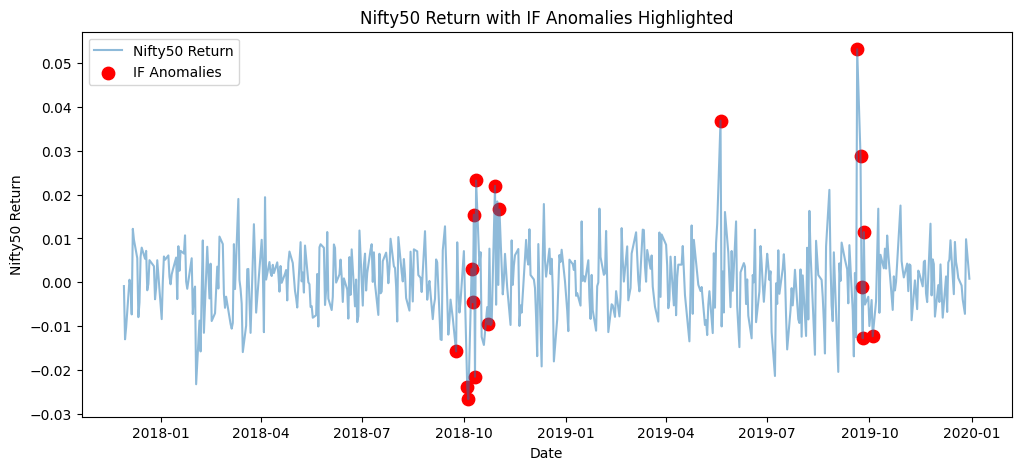

In [42]:
plt.figure(figsize=(12,5))
plt.plot(
    test_nifty50.index,
    test_nifty50["Nifty50_Return"],
    label="Nifty50 Return",
    alpha=0.5
)

anoms_rev_nifty50 = test_nifty50[test_nifty50["IF_label"] == -1]

plt.scatter(
    anoms_rev_nifty50.index,
    anoms_rev_nifty50["Nifty50_Return"],
    color="red",
    s=80,
    label="IF Anomalies"
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Nifty50 Return")
plt.title("Nifty50 Return with IF Anomalies Highlighted")
plt.show()

In [ ]:
### These results show that in 2018 financial anomalies in India
### will follow in the US and that in late 2019, financial anomalies
### in the US will follow in India. 

In [ ]:
### Part 2

In [ ]:
### Here we make subsets that consist only of anomalies
### we obtained in our joint results, S&P500 results and our 
### Nifty50 results. The joint results are from LOF, not IF.
### IF are the separate results. 

In [43]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()
X_anoms_joint = scaler.fit_transform(anoms[lof_features])

kmeans = KMeans(n_clusters=4, random_state=42)
anoms["Cluster"] = kmeans.fit_predict(X_anoms_joint)

In [44]:
scaler = StandardScaler()
X_anoms_nifty50 = scaler.fit_transform(anoms_rev_nifty50[lof_features_nifty50])

kmeans = KMeans(n_clusters=3, random_state=42)
anoms_rev_nifty50["Cluster"] = kmeans.fit_predict(X_anoms_nifty50)

In [45]:
scaler = StandardScaler()
X_anoms_sp500 = scaler.fit_transform(anoms_rev[lof_features_sp500])

kmeans = KMeans(n_clusters=3, random_state=42)
anoms_rev["Cluster"] = kmeans.fit_predict(X_anoms_sp500)

In [ ]:
### The hierarchical function recommends 3 clusters with Nifty50,
### 3 with S&P500 and 4 with combined anomalies. 
### We use random forest classifier each time as well to help
### with the classfication process. 

In [46]:
from scipy.cluster.hierarchy import linkage, fcluster

def hierarchical_suggest_k(X, max_clusters=5):
    Z = linkage(X, method='ward')
    clusters = fcluster(Z, t=max_clusters, criterion='maxclust')
    suggested_k = len(set(clusters))
    return suggested_k

k_nifty = hierarchical_suggest_k(X_anoms_nifty50, max_clusters=3)
k_sp500 = hierarchical_suggest_k(X_anoms_sp500, max_clusters=3)
k_combined = hierarchical_suggest_k(X_anoms_joint, max_clusters=4)

print(f"Nifty50 suggested clusters: {k_nifty}")
print(f"SP500 suggested clusters: {k_sp500}")
print(f"Combined anomalies suggested clusters: {k_combined}")

Nifty50 suggested clusters: 3
SP500 suggested clusters: 3
Combined anomalies suggested clusters: 4


In [47]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_anoms_joint, anoms["Cluster"])

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
### A combination of Nifty50 and S&P500 anomalies from LOF
### with 164 observations considers Nifty_ATR and SP500_ATR
### to be the two most important featues. This is not a coincidence
### because it actually does much to highlight the bidirectional
### relationship of S&P500 and Nifty50 in the sense that 
### when financial anomalies occur in one of these markets,
### the other one will quickly experience financial anomalies
### themselves. 

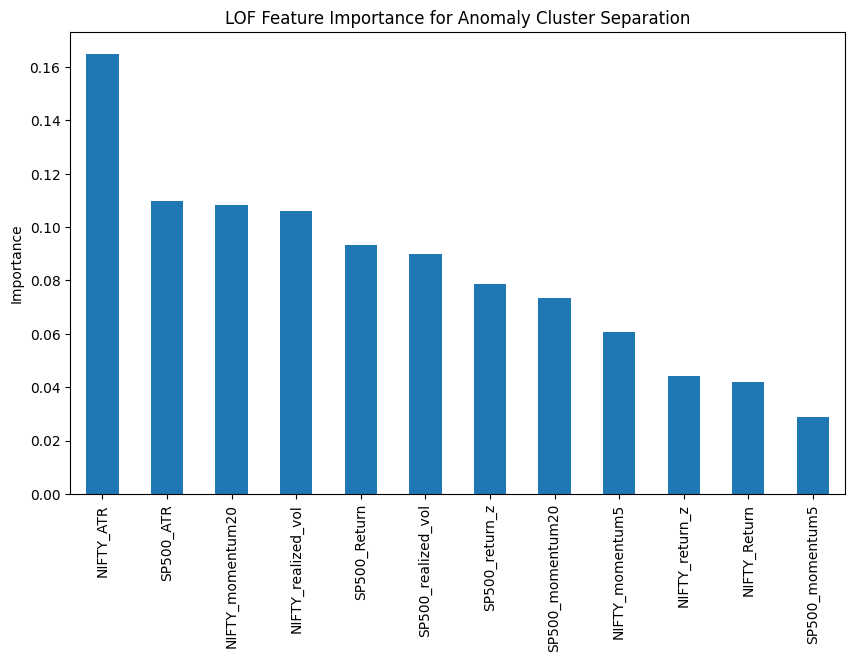

In [48]:
importances = pd.Series(rf.feature_importances_, 
                        index=lof_features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("LOF Feature Importance for Anomaly Cluster Separation")
plt.ylabel("Importance")
plt.show()

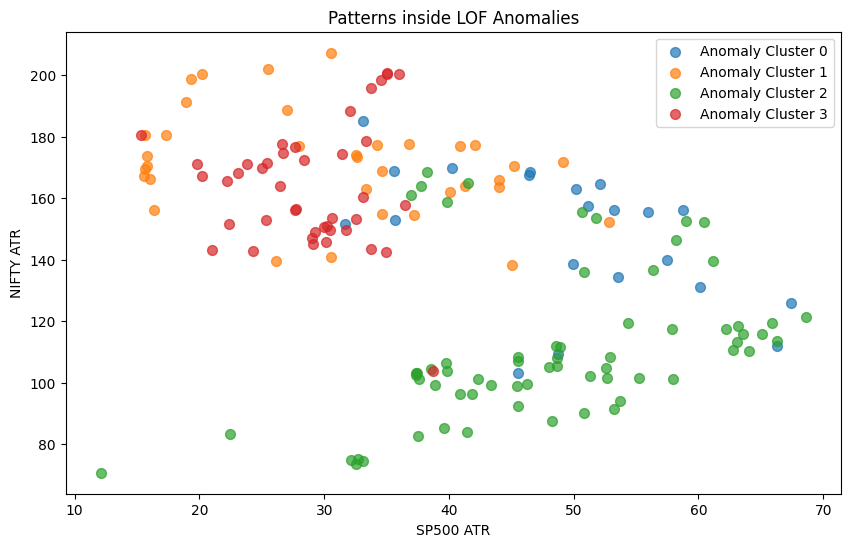

In [49]:
plt.figure(figsize=(10,6))
for c in sorted(anoms["Cluster"].unique()):
    cluster_data = anoms[anoms["Cluster"] == c]
    plt.scatter(
        cluster_data["SP500_ATR"],
        cluster_data["NIFTY_ATR"],
        s=50, label=f"Anomaly Cluster {c}", alpha=0.7
    )
plt.xlabel("SP500 ATR")
plt.ylabel("NIFTY ATR")
plt.title("Patterns inside LOF Anomalies")
plt.legend()
plt.show()

In [50]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_anoms_nifty50, anoms_rev_nifty50["Cluster"])

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
### This shows that momentum5 is the feature that most predicts unusual behavior
### in Nifty50. So that becomes our y-variable in the next plot.

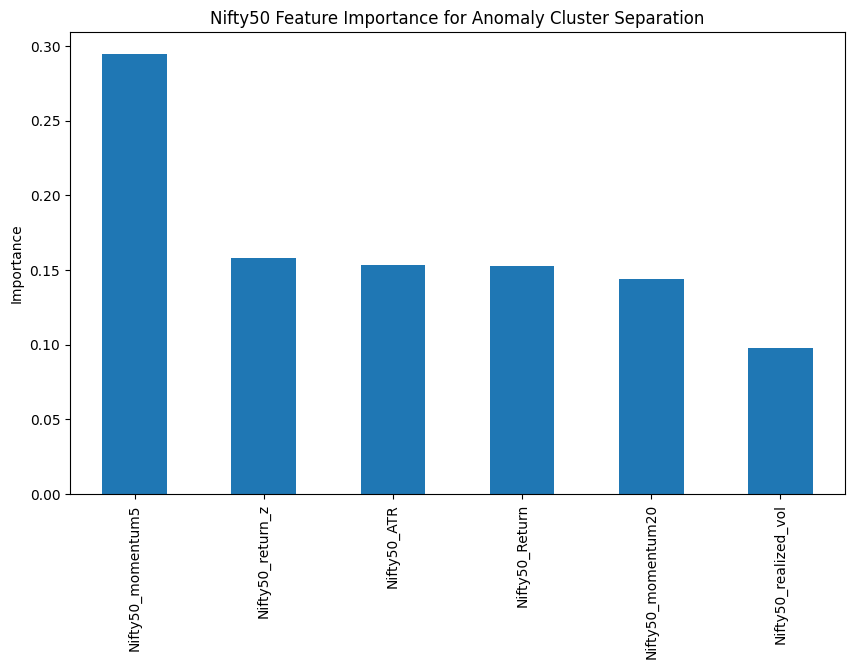

In [51]:
importances = pd.Series(rf.feature_importances_, 
                        index=lof_features_nifty50).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Nifty50 Feature Importance for Anomaly Cluster Separation")
plt.ylabel("Importance")
plt.show()

In [ ]:
### This shows that Nifty50 momen

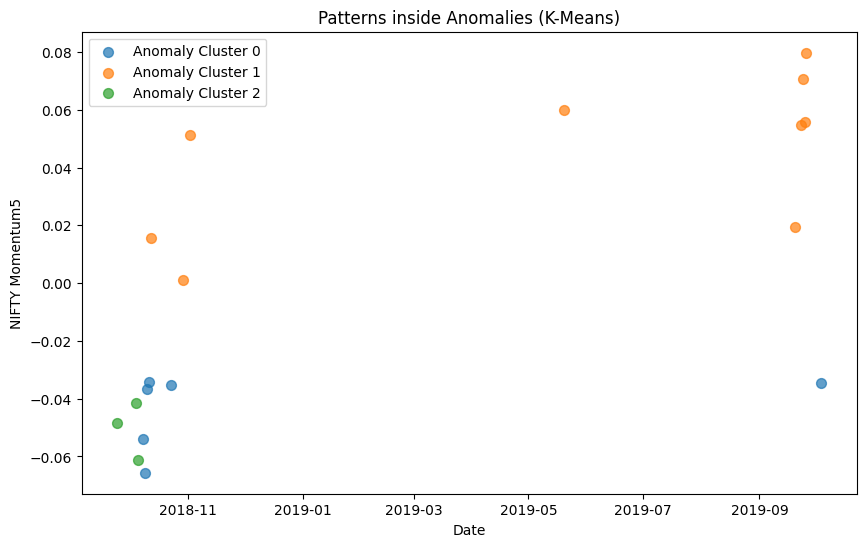

In [52]:
plt.figure(figsize=(10,6))
for c in sorted(anoms_rev_nifty50["Cluster"].unique()):
    cluster_data_nifty50 = anoms_rev_nifty50[anoms_rev_nifty50["Cluster"] == c]
    plt.scatter(
        cluster_data_nifty50.index,
        cluster_data_nifty50["Nifty50_momentum5"],
        s=50, label=f"Anomaly Cluster {c}", alpha=0.7
    )
plt.xlabel("Date")
plt.ylabel("NIFTY Momentum5")
plt.title("Patterns inside Anomalies (K-Means)")
plt.legend()
plt.show()

In [53]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_anoms_sp500, anoms_rev["Cluster"])

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
### This is the S&P500 results, which show that the returns
### are very good at detecting unusual behavior in S&P500. 
### Given that in a previous plot where the returns were either
### really high or really low when there were anomalies expected
### in S&P 500 in IF, this is not surprising. 

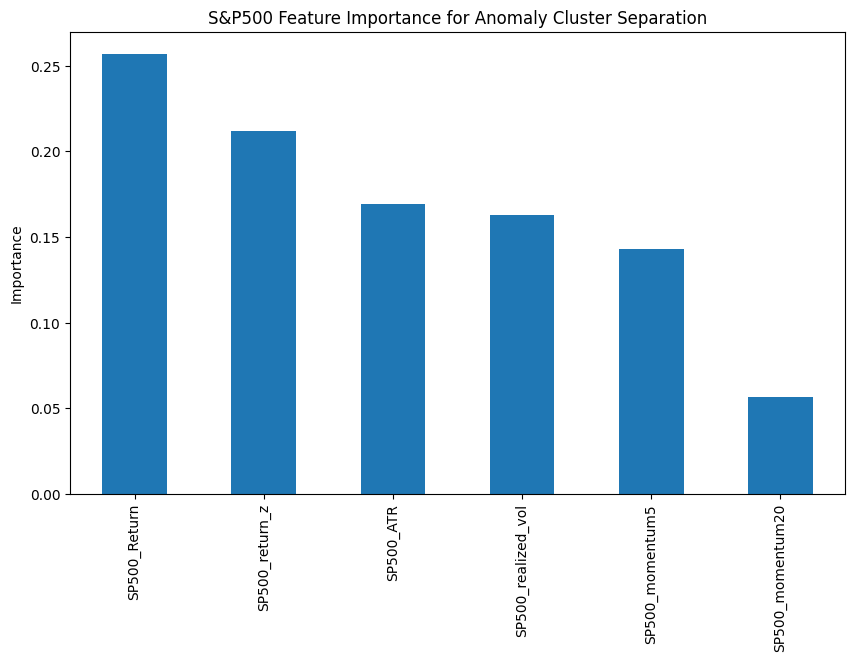

In [54]:
importances = pd.Series(rf.feature_importances_, 
                        index=lof_features_sp500).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("S&P500 Feature Importance for Anomaly Cluster Separation")
plt.ylabel("Importance")
plt.show()

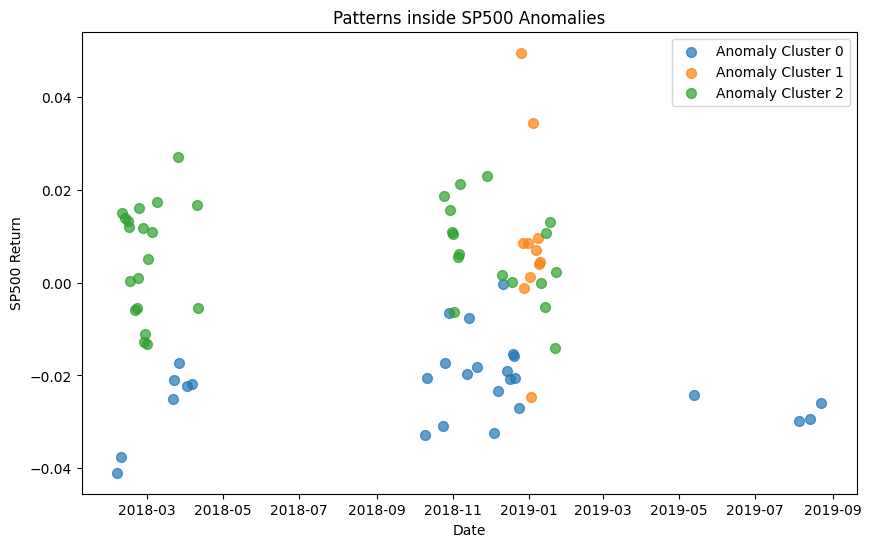

In [55]:

plt.figure(figsize=(10,6))
for c in sorted(anoms_rev["Cluster"].unique()):
    cluster_data_sp500 = anoms_rev[anoms_rev["Cluster"] == c]
    plt.scatter(
        cluster_data_sp500.index,
        cluster_data_sp500["SP500_Return"],
        s=50, label=f"Anomaly Cluster {c}", alpha=0.7
    )
plt.xlabel("Date")
plt.ylabel("SP500 Return")
plt.title("Patterns inside SP500 Anomalies")
plt.legend()
plt.show()

In [ ]:
### Part 3

In [ ]:
### Here we begin building up our supervised forecasting model.
### we stabilize it to random seed of 42. 

In [56]:
import random
import tensorflow as tf
import os


np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(returns[features])
iso_full = returns.copy()
iso_full["IF_Anomaly"] = iso.predict(X_scaled)
iso_full["IF_Anomaly"] = (iso_full["IF_Anomaly"] == -1).astype(int)
y = iso_full["IF_Anomaly"].shift(-1).dropna()
X_scaled = X_scaled[:len(y)]
def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)
window = 30
X_seq, y_seq = create_sequences(X_scaled, y, window)
split = int(len(X_seq) * 0.7)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [ ]:
### This is where we create our sequences and a time series window
### of size 30. Here is where we obtain past anomalies from the 
### training data that was hidden from us when we were using IF and
### LOF for unsupervised learning. This is info we are obtaining now
### that IF and LOF would not have been permitted to know
### at the start of this project. 

In [57]:
split_index = int(len(returns) * 0.7)
train_returns = returns.iloc[:split_index]
test_returns = returns.iloc[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_returns[features])
iso = IsolationForest(n_estimators=200, contamination=0.03, random_state=42)
train_returns['IF_Anomaly'] = (iso.fit_predict(X_train_scaled) == -1).astype(int)

train_returns['Past_Anomaly'] = train_returns['IF_Anomaly'].shift(1).fillna(0)

X_train = np.hstack([X_train_scaled, 
                     train_returns['Past_Anomaly'].values.reshape(-1, 1)])
y_train = train_returns['IF_Anomaly'].shift(-1).dropna()
X_train = X_train[:len(y_train)]

X_test_scaled = scaler.transform(test_returns[features])
test_returns['IF_Anomaly'] = (iso.predict(X_test_scaled) == -1).astype(int)

test_returns['Past_Anomaly'] = test_returns['IF_Anomaly'].shift(1).fillna(0)
X_test = np.hstack([X_test_scaled, 
                    test_returns['Past_Anomaly'].values.reshape(-1, 1)])
y_test = test_returns['IF_Anomaly'].shift(-1).dropna()
X_test = X_test[:len(y_test)]

def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

window = 30
X_train_seq, y_train_seq = create_sequences(X_train, y_train.values, window)
X_test_seq, y_test_seq = create_sequences(X_test, y_test.values, window)

X_tr_seq, X_val_seq = X_train_seq[:int(len(X_train_seq)*0.7)], X_train_seq[
    int(len(X_train_seq)*0.7):]
y_tr_seq, y_val_seq = y_train_seq[:int(len(y_train_seq)*0.7)], y_train_seq[
    int(len(y_train_seq)*0.7):]


In [ ]:
### This is where we build 20 epochs with our sequential data
### and with an Long-Term Short Memory (LSTM) model. 
### we take into account the severe imbalance of our 2 classes:
### Non-anomalies (Class 0) and anomalies (1). 

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

from sklearn.utils.class_weight import compute_class_weight

y_train_flat = y_train_seq.flatten()
classes = np.unique(y_train_flat)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, 
                                     y=y_train_flat)
class_weight_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weight_dict)


model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_tr_seq.shape[1], 
                                                  X_tr_seq.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_tr_seq,
    y_tr_seq,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    class_weight=class_weight_dict,
    verbose=1
)

Class weights: {np.float64(0.0): np.float64(0.5161141804788214), np.float64(1.0): np.float64(16.014285714285716)}
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3695 - loss: 0.7391 - val_accuracy: 0.8991 - val_loss: 0.5666
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6197 - loss: 0.5724 - val_accuracy: 0.9318 - val_loss: 0.4427
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7746 - loss: 0.4849 - val_accuracy: 0.9822 - val_loss: 0.2323
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8392 - loss: 0.4538 - val_accuracy: 0.9674 - val_loss: 0.2599
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8428 - loss: 0.4062 - val_accuracy: 0.9792 - val_loss: 0.1627
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8686 - loss: 0.5004 - val_accuracy: 0.9852 - val_loss: 0.1524
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8759 - loss: 0.3906 - val_accuracy: 0.9822 - val_loss: 0.13

In [ ]:
### These constraints help ensure that we reach our target recall
### of 80 percent. This is achieved with the help of an F1 constraint.
### This model, unliek the unsupervised methods of IF and LOF,
### use past anomalies from the training data to predict 
### the anomalies in the testing data. It is strong enough
### to be at 80 percent recall. Recall is what we care more about
### than F1 and precision. Because recall caclualates the rate 
### at which we correctly detect anomalies. 

### It is considered pretty good if a recall rate is like 40 percent
### when handling this financial forecasting data with severe
### class imbalances. So having a recall rate of 80 percent
### makes for a very solid model here. 

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

y_prob = model.predict(X_test_seq).flatten()
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test_seq, 
                                                                 y_prob)

f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + 
                                                  recall_vals + 1e-8)

target_recall = 0.8
valid_idx = np.where(recall_vals >= target_recall)[0]

if len(valid_idx) > 0:
    best_idx = valid_idx[f1_scores[valid_idx].argmax()]
    stable_threshold = thresholds[best_idx]
else:
    stable_threshold = 0.5 

y_pred = (y_prob > stable_threshold).astype(int)


precision = precision_score(y_test_seq, y_pred)
recall = recall_score(y_test_seq, y_pred)
f1 = f1_score(y_test_seq, y_pred)
cm = confusion_matrix(y_test_seq, y_pred)

print(f"Threshold: {stable_threshold:.3f}")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
print("Confusion Matrix:\n", cm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Threshold: 0.038
Precision: 0.190, Recall: 0.857, F1: 0.312
Confusion Matrix:
 [[203 204]
 [  8  48]]
